# Bristol City Council Land and Building Assets challenge
## Unit 2 Problem Definition and Suggested Solutions

# Useful links
## Data source
https://www.data.gov.uk/dataset/a98345ad-7f4c-4f6e-882b-e631dc1cc046/bristol-city-council-land-and-building-assets

https://www.bristol.gov.uk/files/documents/7241-land-property-2023/file

## Programming
https://www.projectpro.io/recipes/explain-structtype-and-structfield-pyspark-databricks#:~:text=The%20StructField%20in%20PySpark%20represents,the%20name%20of%20the%20StructField

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.types.StructType.html#:~:text=.StructType%5Bsource%5D-,Construct%20a%20StructType%20by%20adding%20new%20elements%20to%20it%2C%20to,)%2C%20metadata(optional)

https://sparkbyexamples.com/pyspark/pyspark-read-csv-file-into-dataframe/

https://sparkbyexamples.com/pyspark/pyspark-sql-date-and-timestamp-functions/

https://spark.apache.org/examples.html and https://github.com/apache/spark/tree/master/examples/src/main/python


## Mount Azure blob storage

In [3]:
%%capture
%pip install mount-azure-blob==0.0.3
from mount_azure_blob import mount_storage
mount_storage(mount_path="bdv-2024-05-09t15-59-02-855z", config_file=None)
# ac name = bdvhdistorage
# key = Y9hLYCnsn7zotuXaV6mYamGUnEFKU4FVN0BWhxJLfZyQODoLmqVtHTQqFM8f2vX6NjaxIUDS1DSU+AStBOYXmQ==
# cont name = bdv-2024-05-09t15-59-02-855z
# path = bdv-2024-05-09t15-59-02-855z

# Install PySpark and dependencies

In [20]:
!apt-get update # Update apt-get repository.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install Java.
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz # Download Apache Sparks.
!tar xf spark-3.1.1-bin-hadoop3.2.tgz # Unzip the tgz file.
!pip install -q findspark # Install findspark. Adds PySpark to the System path during runtime.

# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

!ls

# Initialize findspark
import findspark
findspark.init()

# Create a PySpark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://packages.microsoft.com/ubuntu/20.04/prod focal InRelease
Hit:5 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
^C
bdv-2024-05-09t15-59-02-855z  spark-3.1.1-bin-hadoop3.2      spark-3.1.1-bin-hadoop3.2.tgz.1
sample_data		      spark-3.1.1-bin-hadoop3.2.tgz


## Load data

In [22]:
# Load CSV - can be from a standalone local file, or online file source - here is is a  in storage blob
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.types import DoubleType, BooleanType, DateType, LongType, FloatType
# Using custom schema
schema =  StructType() \
      .add("Organisation Name", StringType(), True) \
      .add("Organisation Code", StringType(), True) \
      .add("Effective Date", DateType(), True) \
      .add("UPRN", StringType(), True) \
      .add("Property ID", IntegerType(), True) \
      .add("Property Type", StringType(), True) \
      .add("Property Name/Address (Where no UPRN)", StringType(), True) \
      .add("Property Address Detail", StringType(), True) \
      .add("Secondary Address Detail", StringType(), True) \
      .add("Street Number", StringType(), True) \
      .add("Street", StringType(), True) \
      .add("Town / Post Town", StringType(), True) \
      .add("Post Code", StringType(), True) \
      .add("Ward", StringType(), True) \
      .add("Geo X (Easting)", LongType(), True) \
      .add("Geo Y (Northing)", LongType(), True) \
      .add("Tenure Type", StringType(), True) \
      .add("Ground Lease In", StringType(), True) \
      .add("Ground Lease Out", StringType(), True) \
      .add("Lease In to Council", StringType(), True) \
      .add("Lease Out", StringType(), True) \
      .add("Licence In to Council", StringType(), True) \
      .add("Licence Out", StringType(), True) \
      .add("Sub-lease In to Council", StringType(), True) \
      .add("Sub-lease Out", StringType(), True) \
      .add("Vacant", StringType(), True) \
      .add("Asset Type", StringType(), True) \
      .add("Building Size - GIA (M2)", FloatType(), True) \
      .add("Site Area (Hectares)", FloatType(), True) \
      .add("Occupied by Council / Direct Service Property", StringType(), True) \
      .add("Purpose / Asset Category", StringType(), True)

df = spark.read.format("csv") \
      .options(header="True", inferSchema="False", delimiter=",", dateFormat="d/M/yyyy") \
      .schema(schema) \
      .load("/content/bdv-2024-05-09t15-59-02-855z/HdiSamples/BristolCityCouncilLandAndBuildingAssets-2024.csv")

## Show schema

In [23]:
# Show schema
df.printSchema()
# Show dataframe
df.show()
from IPython.display import display
display(df)

root
 |-- Organisation Name: string (nullable = true)
 |-- Organisation Code: string (nullable = true)
 |-- Effective Date: date (nullable = true)
 |-- UPRN: string (nullable = true)
 |-- Property ID: integer (nullable = true)
 |-- Property Type: string (nullable = true)
 |-- Property Name/Address (Where no UPRN): string (nullable = true)
 |-- Property Address Detail: string (nullable = true)
 |-- Secondary Address Detail: string (nullable = true)
 |-- Street Number: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- Town / Post Town: string (nullable = true)
 |-- Post Code: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Geo X (Easting): long (nullable = true)
 |-- Geo Y (Northing): long (nullable = true)
 |-- Tenure Type: string (nullable = true)
 |-- Ground Lease In: string (nullable = true)
 |-- Ground Lease Out: string (nullable = true)
 |-- Lease In to Council: string (nullable = true)
 |-- Lease Out: string (nullable = true)
 |-- Licence In to 

DataFrame[Organisation Name: string, Organisation Code: string, Effective Date: date, UPRN: string, Property ID: int, Property Type: string, Property Name/Address (Where no UPRN): string, Property Address Detail: string, Secondary Address Detail: string, Street Number: string, Street: string, Town / Post Town: string, Post Code: string, Ward: string, Geo X (Easting): bigint, Geo Y (Northing): bigint, Tenure Type: string, Ground Lease In: string, Ground Lease Out: string, Lease In to Council: string, Lease Out: string, Licence In to Council: string, Licence Out: string, Sub-lease In to Council: string, Sub-lease Out: string, Vacant: string, Asset Type: string, Building Size - GIA (M2): float, Site Area (Hectares): float, Occupied by Council / Direct Service Property: string, Purpose / Asset Category: string]

In [24]:
# Register the dataframe as a virtual HIVE table to allow SparkSQL
#df.registerTempTable('BristolCouncilAssets') # depracated form of command, nopw replaced with ...
df.createOrReplaceTempView('BristolCouncilAssets')

# Problem 1
How many ‘Properties’ are Bristol City Council (BCC) responsible for (as owner, user or manager)?



In [42]:
query = """
SELECT Count(*) AS Count
FROM BristolCouncilAssets
"""
print(spark.sql(query).toPandas())

   Count
0   3805


# Problem 2
How many unique ‘Property Type’s are Bristol City Council (BCC) responsible for (as owner, user or manager)?


In [43]:
query = """
SELECT DISTINCT `Property Type`
FROM BristolCouncilAssets
ORDER BY `Property Type`
"""
print(spark.sql(query).toPandas())

                            Property Type
0                     Access/Right Of Way
1                  Agricultural Buildings
2                   Block/Blocks Of Flats
3                          Bridge/Pontoon
4                             Bus Shelter
..                                    ...
103  Training/Community/Further Education
104                      Transfer Station
105                                Tunnel
106                     Underground Store
107                     Youth Club/Centre

[108 rows x 1 columns]


The above output is broken down to show all the seperate property types - if we just want a total count then we can do as is shown below.


In [44]:
query = """
SELECT Count(*) AS Count
FROM (SELECT DISTINCT `Property Type` FROM BristolCouncilAssets) types
"""
print(spark.sql(query).toPandas())

   Count
0    108


# Problem 3
How many properties are there in each of the ‘Property Types’?


In [45]:
query = """
SELECT `Property Type`, Count(*) AS Count
FROM BristolCouncilAssets
GROUP BY `Property Type`
ORDER BY `Property Type`
"""
print(spark.sql(query).toPandas())

                            Property Type  Count
0                     Access/Right Of Way     20
1                  Agricultural Buildings      2
2                   Block/Blocks Of Flats      1
3                          Bridge/Pontoon     17
4                             Bus Shelter      5
..                                    ...    ...
103  Training/Community/Further Education      8
104                      Transfer Station      1
105                                Tunnel      2
106                     Underground Store      3
107                     Youth Club/Centre      7

[108 rows x 2 columns]


# Problem 4
Show a histogram classifying the total area (in Ha) of each of these 'property types'

Note the SQL statement is parametised below to capture the output to a query result 'propertytypes', which can then be used to produce a plot below.


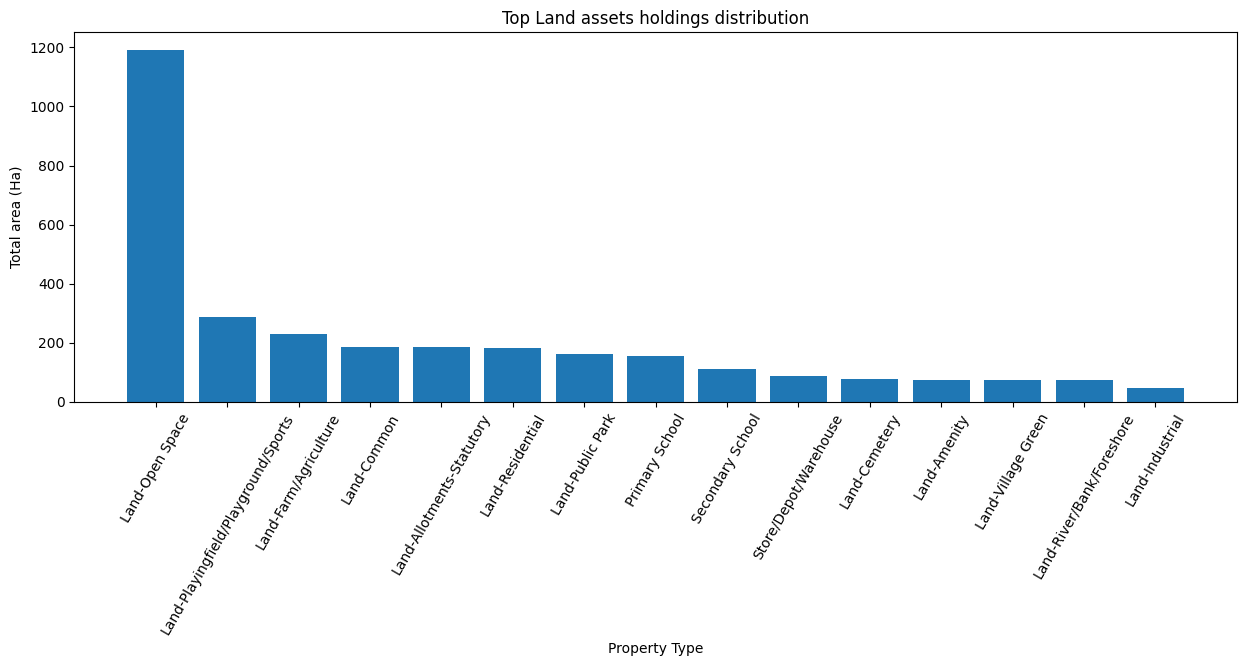

In [60]:
import matplotlib.pyplot as plt
query = """
SELECT `Property Type`, Sum(`Site Area (Hectares)`) AS Sum
FROM BristolCouncilAssets
GROUP BY `Property Type`
ORDER BY Sum(`Site Area (Hectares)`) DESC LIMIT 15
"""
propertytypes = spark.sql(query).toPandas()
plt.figure(1).set_figwidth(15)
plt.title('Top Land assets holdings distribution')
plt.xlabel('Property Type')
plt.xticks(rotation=60)
plt.ylabel('Total area (Ha)')
plt.bar(propertytypes['Property Type'], propertytypes['Sum'])
plt.show()


In [78]:
import pandas as pd
df_pd = df.toPandas()
print(df_pd[['Property Type', 'Site Area (Hectares)']].head(5))
print('\nCheck that df_pd is a pandas dataframe: ',isinstance(df_pd, pd.DataFrame))

         Property Type  Site Area (Hectares)
0  Land-Car/Lorry Park              0.058500
1          Land-Garden              0.014800
2           Land-Verge              0.675358
3  Industrial/Workshop              0.493444
4           Land-Verge              0.014700

Check that df_pd is a pandas dataframe:  True


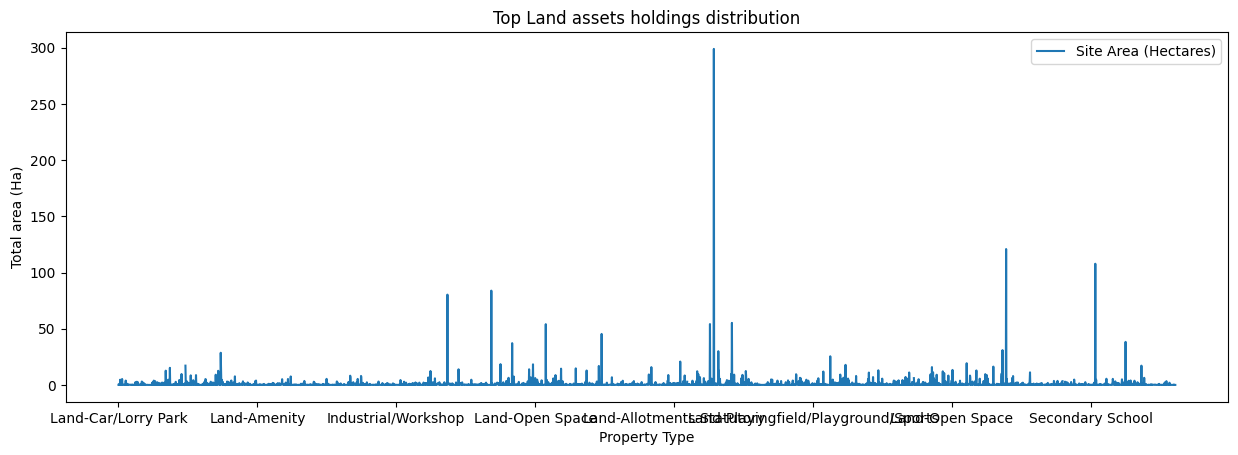

In [77]:
plt.figure().set_figwidth(15)
ax1 = plt.axes()
plt.title('Top Land assets holdings distribution')
plt.xlabel('Property Type')
plt.xticks(rotation=60)
plt.ylabel('Total area (Ha)')
df_pd.plot(x='Property Type', y='Site Area (Hectares)', ax=ax1)
plt.show()


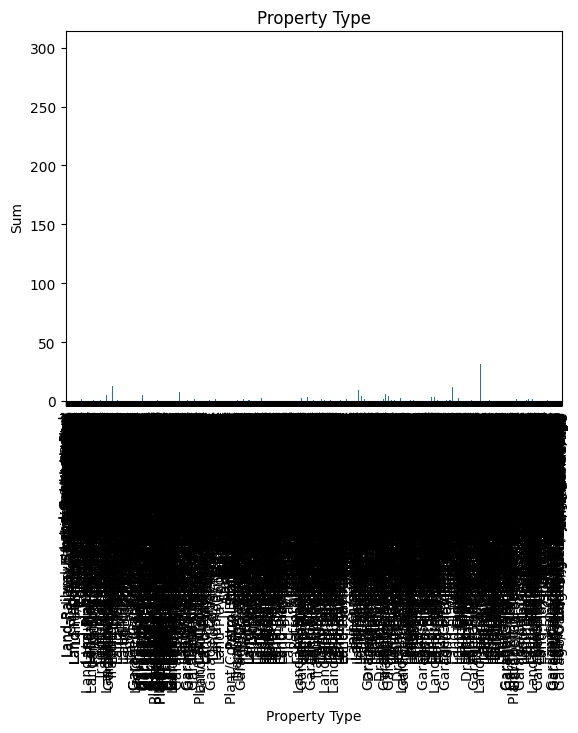

In [79]:
df_pd.plot('Property Type','Site Area (Hectares)', kind='bar', legend=False)
plt.ylabel('Sum')
plt.title('Property Type')
plt.show()

# Problem 5
For each of these grouped properties, what are the numbers of properties in each ‘tenure type’ recorded?


In [80]:
query = """
SELECT `Property Type`, `Tenure Type`, COUNT(*) AS Count
FROM BristolCouncilAssets
GROUP BY `Tenure Type`, `Property Type`
ORDER BY `Property Type` DESC
"""
print(spark.sql(query).toPandas())

              Property Type             Tenure Type  Count
0         Youth Club/Centre                Freehold      6
1         Youth Club/Centre               Leasehold      1
2         Underground Store                Freehold      3
3                    Tunnel                Freehold      1
4                    Tunnel  Maintenance Obligation      1
..                      ...                     ...    ...
193             Bus Shelter                Freehold      5
194          Bridge/Pontoon                Freehold     17
195   Block/Blocks Of Flats                Freehold      1
196  Agricultural Buildings                Freehold      2
197     Access/Right Of Way                Freehold     20

[198 rows x 3 columns]
